In [1]:
import pandas as pd

data = pd.read_csv('./Passageiros.csv')

data.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

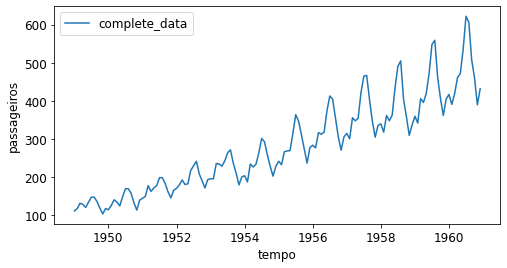

In [2]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,4)
mpl.rcParams['font.size'] = (12)
sns.lineplot(x='tempo', y='passageiros', data = data, label='complete_data')

In [3]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

s_scaler.fit(data)

data_scalated = s_scaler.transform(data)

x = data_scalated[:,0]
y = data_scalated[:,1]

<AxesSubplot:xlabel='Data', ylabel='Passageiros'>

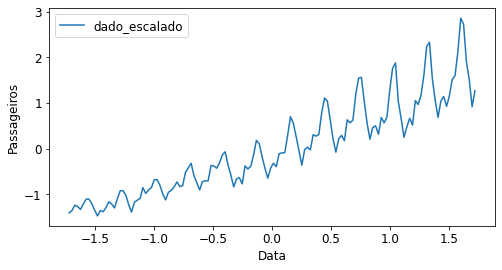

In [4]:
import matplotlib.pyplot as plt

plt.xlabel('Data')
plt.ylabel('Passageiros')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [5]:
tamanho_treino = int(len(data)*0.9)

tamanho_teste = int(len(data)*0.1)

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste =  x[tamanho_treino:len(data)]
yteste =  y[tamanho_treino:len(data)]



<AxesSubplot:xlabel='Data', ylabel='Passageiros'>

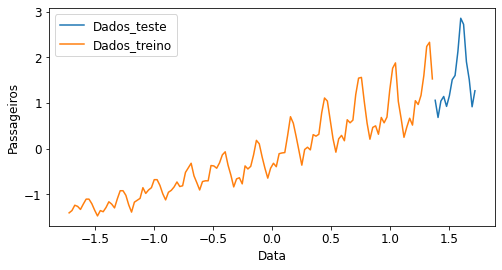

In [6]:
plt.xlabel('Data')
plt.ylabel('Passageiros')

sns.lineplot(x=xteste, y=yteste, label='Dados_teste')
sns.lineplot(x=xtreino, y=ytreino, label='Dados_treino')

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

regressor = Sequential()

In [8]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones', activation='linear', use_bias=False))

regressor.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [10]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 2s 11ms/step - loss: 0.1285


In [11]:
y_predict = regressor.predict(xtreino)

<AxesSubplot:>

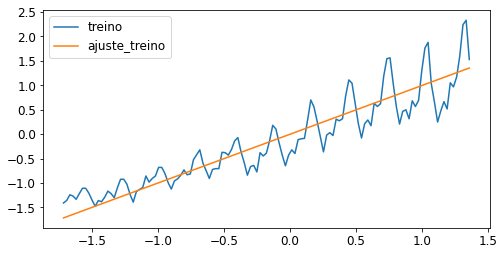

In [12]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [13]:
d = { 'tempo': xtreino, 'passageiros': y_predict[:,0]}

resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.713535
1,-1.696007,-1.689570
2,-1.671950,-1.665604
3,-1.647894,-1.641639
4,-1.623837,-1.617673
...,...,...
124,1.262984,1.258190
125,1.287041,1.282156
126,1.311098,1.306121
127,1.335155,1.330087


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

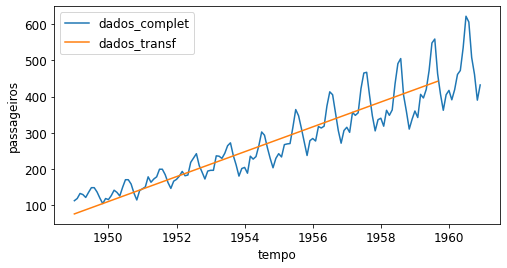

In [14]:
resultado_transf = s_scaler.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']

sns.lineplot(x='tempo', y='passageiros', data=data, label='dados_complet')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='dados_transf')

In [15]:
y_predict_teste = regressor.predict(xteste)

d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}

resultados_teste = pd.DataFrame(data=d)

In [16]:
resultado_transf_teste = s_scaler.inverse_transform(resultados_teste)

resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

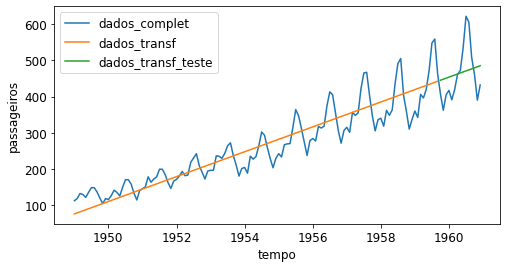

In [17]:
sns.lineplot(x='tempo', y='passageiros', data=data, label='dados_complet')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='dados_transf')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='dados_transf_teste')

In [24]:
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                    activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                    activation='sigmoid', use_bias=False))

regressor2.add(Dense(1, kernel_initializer='random_uniform',
                    activation='linear', use_bias=False))



In [21]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

regressor2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 8         
                                                                 
 dense_7 (Dense)             (None, 8)                 64        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [22]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 0.8094
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8089
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8082
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8072
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8057
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8034
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8006
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7966
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7916
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7848
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7762
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7650
Epoch 13/200
5/5 [==============================] - 0s 4ms/st

5/5 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 105/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1218
Epoch 106/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1216
Epoch 107/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1218
Epoch 108/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1218
Epoch 109/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1216
Epoch 110/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1217
Epoch 111/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 112/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1222
Epoch 113/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1223
Epoch 114/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1223
Epoch 115/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1216
Epoch 116/200
5/5 [==============================] - 0

<AxesSubplot:>

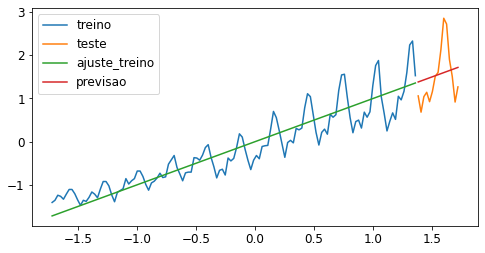

In [23]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsao')